In [18]:
import pandas as pd
import numpy as np

In [19]:
import sys

In [20]:
data = pd.read_excel("sample_data.xlsx")

In [21]:
print(data.loc[0])

Sl. No.     1.0
M1         42.0
M2          NaN
M3         96.0
M4         96.0
M5         39.0
Name: 0, dtype: float64


In [22]:
print(data['M4'])

0    96.0
1    66.0
2     NaN
3    60.0
4    75.0
Name: M4, dtype: float64


In [23]:
data.iloc[1][2]

12.0

In [60]:
data

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.0,NaN,96,96.0,39
1,2,81.0,12.0,66,66.0,81
2,3,30.0,18.0,6,NaN,63
3,4,NaN,75.0,75,60.0,21
4,5,30.0,3.0,51,75.0,60


In [62]:
data.iloc[:, 1:6:2]

,M1,M3,M5
0,42.0,96,39
1,81.0,66,81
2,30.0,6,63
3,NaN,75,21
4,30.0,51,60


In [25]:
data.loc[2:, ['M1', 'M2', 'M4']]

,M1,M2,M4
2,30.0,18.0,NaN
3,NaN,75.0,60.0
4,30.0,3.0,75.0


In [26]:
avg = data.mean()
avg

Sl. No.     3.00
M1         45.75
M2         27.00
M3         58.80
M4         74.25
M5         52.80
dtype: float64

In [27]:
data.apply(lambda x: x.isnull())

,Sl. No.,M1,M2,M3,M4,M5
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,True,False,False,False,False
4,False,False,False,False,False,False


In [28]:
data

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.0,NaN,96,96.0,39
1,2,81.0,12.0,66,66.0,81
2,3,30.0,18.0,6,NaN,63
3,4,NaN,75.0,75,60.0,21
4,5,30.0,3.0,51,75.0,60


In [29]:
data.apply(lambda x: x.apply(lambda y: avg[x.name] if pd.isna(y) else y))

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.00,27.0,96,96.00,39
1,2,81.00,12.0,66,66.00,81
2,3,30.00,18.0,6,74.25,63
3,4,45.75,75.0,75,60.00,21
4,5,30.00,3.0,51,75.00,60


In [54]:
na_filled = data.fillna(avg)
data2 = na_filled
data2

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.00,27.0,96,96.00,39
1,2,81.00,12.0,66,66.00,81
2,3,30.00,18.0,6,74.25,63
3,4,45.75,75.0,75,60.00,21
4,5,30.00,3.0,51,75.00,60


In [31]:
MAX = data2.max()
MIN = data2.min()
MAX
MIN

Sl. No.     1.0
M1         30.0
M2          3.0
M3          6.0
M4         60.0
M5         21.0
dtype: float64

In [32]:
data

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.0,NaN,96,96.0,39
1,2,81.0,12.0,66,66.0,81
2,3,30.0,18.0,6,NaN,63
3,4,NaN,75.0,75,60.0,21
4,5,30.0,3.0,51,75.0,60


In [37]:
temp = data2.iloc[:, 1:]
temp

,M1,M2,M3,M4,M5
0,42.00,27.0,96,96.00,39
1,81.00,12.0,66,66.00,81
2,30.00,18.0,6,74.25,63
3,45.75,75.0,75,60.00,21
4,30.00,3.0,51,75.00,60


In [38]:
temp.sum(axis=1)

0    300.00
1    306.00
2    191.25
3    276.75
4    219.00
dtype: float64

In [50]:
data2["Total"] = temp.sum(axis = 1)
data2

,Sl. No.,M1,M2,M3,M4,M5,Total
0,1,42.00,27.0,96,96.00,39,300.00
1,2,81.00,12.0,66,66.00,81,306.00
2,3,30.00,18.0,6,74.25,63,191.25
3,4,45.75,75.0,75,60.00,21,276.75
4,5,30.00,3.0,51,75.00,60,219.00


In [47]:
data

,Sl. No.,M1,M2,M3,M4,M5
0,1,42.0,NaN,96,96.0,39
1,2,81.0,12.0,66,66.0,81
2,3,30.0,18.0,6,NaN,63
3,4,NaN,75.0,75,60.0,21
4,5,30.0,3.0,51,75.0,60


In [51]:
total = data2["Total"]
total

0    300.00
1    306.00
2    191.25
3    276.75
4    219.00
Name: Total, dtype: float64

In [52]:
data2["Normalized Total"] = (total - total.min())/(total.max() - total.min())
data2

,Sl. No.,M1,M2,M3,M4,M5,Total,Normalized Total
0,1,42.00,27.0,96,96.00,39,300.00,0.947712
1,2,81.00,12.0,66,66.00,81,306.00,1.000000
2,3,30.00,18.0,6,74.25,63,191.25,0.000000
3,4,45.75,75.0,75,60.00,21,276.75,0.745098
4,5,30.00,3.0,51,75.00,60,219.00,0.241830


<Axes: >

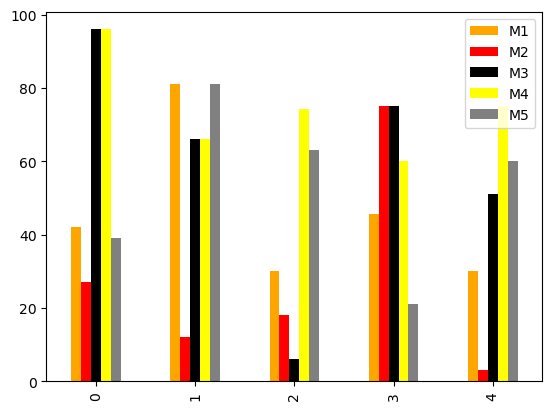

In [65]:
na_filled.iloc[:, 1:].plot(kind = 'bar', color=['Orange', 'Red', 'Black', 'Yellow', 'Gray'])

In [58]:
data2.to_excel("updated_sample_data.xlsx")